In [1]:
from IPython.display import Image

# 컴퓨터가 단어의 의미를 잘 파악할 수 있게 하는 표현 방법   
## : 분산표현   
### 단어의 좋은 분산 표현은 단어를 고정길이의 밀집벡터로 표현한다   
   
      
         

### 1. 사람이 직접 단어의 의미를 정의해주는 방식   
: 시소러스(동의어-유의어 사전) 를 만들어 단어들의 관계를 그래프로 표현해 단어사이의 연결을 정의    
: 단어 네트워크를 이용해 컴퓨터에게 단어사이의 관계를 가르침   https://questionet.tistory.com/38?category=955972   


## 2.  분포가설 : 단어 자체엔 의미가 없고, 단어의 의미는 주변 단어(맥락)에 의해 형성된다   
      
         
         맥락의 크기 = 윈도우 크기   
         ex) 윈도우 크기가 2인 경우

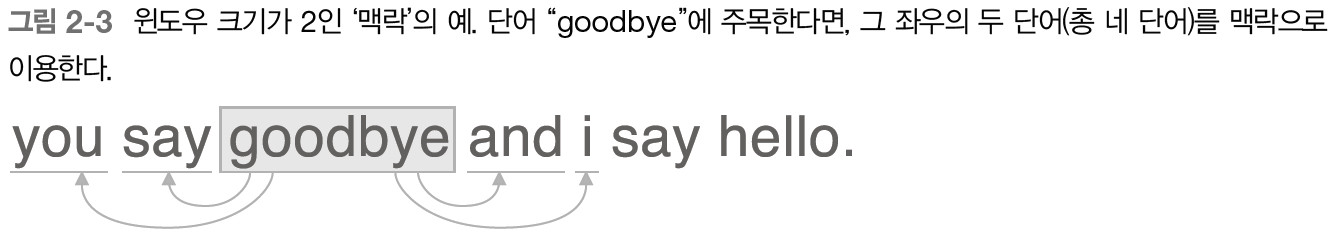

In [16]:
Image("1.png")

## (1) 통계기반방법   


   
### 1) 동시발생행렬 (co-occurrence matrix)    
 
    
    
: 어떤 단어에 주목했을 때, 그 **단어 주변에 어떤 단어가 몇 번 등장하는지 센다**

### preprocess, vocab, tokenize 함수

In [18]:
text = "You say goodbye and I say hello."

In [19]:
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split()
    return words

preprocess(text)

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

### vocab

In [25]:
def vocab(words):
    
    word_to_id = {}
    id_to_word = {}

    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
            

            
    return word_to_id, id_to_word

words = preprocess(text)
word_to_id, id_to_word = vocab(words)

print("word_to_id: ", word_to_id)  # vocab 크기는 7
print("id_to_word: ", id_to_word)

word_to_id:  {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
id_to_word:  {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


### tokenize

In [21]:
import numpy as np

def tokenize(word_to_id):
    
    corpus = [word_to_id[w] for w in words]
    corpus = np.array(corpus)
    return corpus

tokenize(word_to_id)

array([0, 1, 2, 3, 4, 1, 5, 6])


   
    윈도우 크기가 1일 때 동시발생행렬

In [24]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

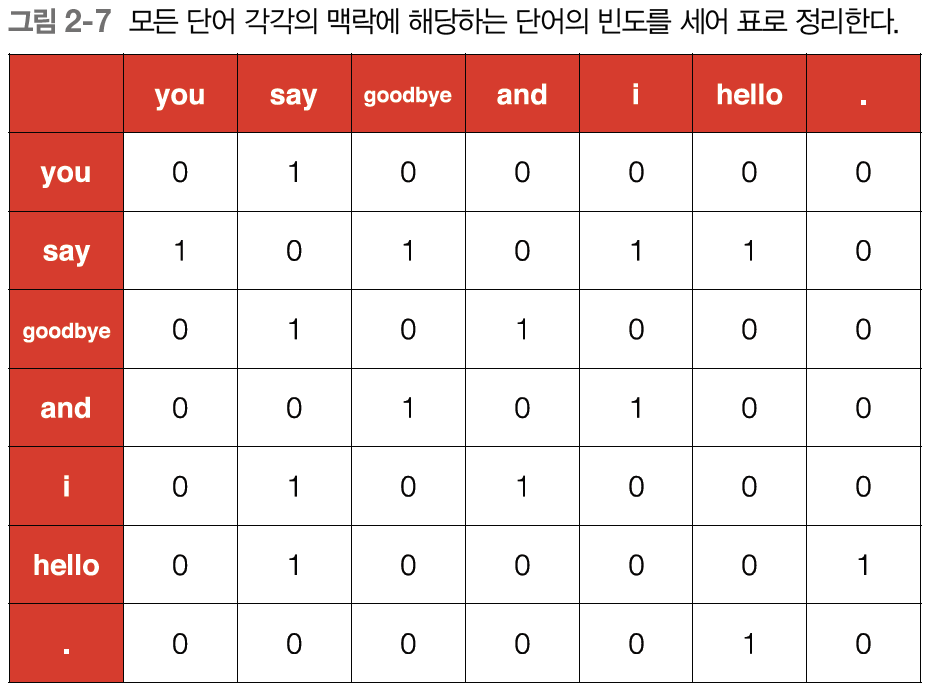

In [23]:
Image("2.png")

동시발생행렬의 각 행은 해당 단어를 표현한 벡터가 된다

### 동시발생 행렬 만드는 함수 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 다시 볼 것

In [27]:
def create_co_matrix(corpus, vocab_size, window_size=1):  
    corpus_size = len(corpus)    # corpus_size = vocab_size = 7
    co_matrix = np.zeros((vocab_size, vocab_size), dtype = np.int32)
    
    for idx, word_id in enumerate(corpus):  # idx: 0  word_id: 0  ~  idx: 1  word_id: 1
        for i in range(1, window_size+1):  
            left_idx = idx - i              #  left_idx = 0 - 1 = -1  ~   left_idx = 1 - 1 = 0
            right_idx = idx + i             # right_idx = 0 + 1 =  1  ~  right_idx = 1 + 1 = 2
            
            if left_idx >= 0:
                left_word_id = corpus[left_idx]                     # ~  0 = corpus[0]
                co_matrix[word_id, left_word_id] += 1               # ~ co_matrix[1,0] = co_matrix[1,0] + 1
                
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]   # 1 = corpus[1]   ~  2 = corpus[2]
                co_matrix[word_id, right_word_id] += 1 # co_matrix[0, 1] = co_matrix[0, 1] + 1 ~ co_matrix [1,2] += 1
    
    return co_matrix

In [28]:
text = "You say goodbye and I say hello."
words = preprocess(text)
word_to_id, id_to_word = vocab(words)
corpus = tokenize(word_to_id)
co_matrix = create_co_matrix(corpus, 7)
co_matrix

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]])

In [38]:
for i, j in enumerate(corpus):
    print("idx:",i, " word_id:", j)

idx: 0  word_id: 0
idx: 1  word_id: 1
idx: 2  word_id: 2
idx: 3  word_id: 3
idx: 4  word_id: 4
idx: 5  word_id: 1
idx: 6  word_id: 5
idx: 7  word_id: 6


In [36]:
for i in range(1, 2):
    print(i)

1


In [40]:
corpus[1]

1

In [42]:
co_matrix = np.zeros((7, 7))
co_matrix

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [43]:
co_matrix[0, 1] = co_matrix[0, 1] + 1
co_matrix

array([[0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [44]:
co_matrix[1,0] = co_matrix[1,0] + 1
co_matrix

array([[0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [45]:
co_matrix [1,2] += 1
co_matrix

array([[0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

### 벡터 간 유사도(코사인 유사도) 구하는 함수

코사인 유사도 참고  https://questionet.tistory.com/32

In [48]:
def cos_similarity(x, y, eps = 1e-8):           # 입력값으로 넘파이 배열을 받는다 
    nx = x / (np.sqrt(np.sum(x**2)) + eps)  # 이렇게 보면 코사인 유사도는 각 벡터를 정규화한 다음 내적하는 것과 같다. 
    ny = y / (np.sqrt(np.sum(y**2)) + eps)
    return np.dot(nx, ny)

In [49]:
C = create_co_matrix(corpus, vocab_size=7)
c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]
print(cos_similarity(c0, c1))

0.7071067691154799


### 단어 유사도 랭킹을 출력하는 함수

In [52]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    '''
    query: 검색어
    word_to_id: 단어에서 단어 ID로 변환하는 딕셔너리
    id_to_word: 단어 ID에서 단어로 변환하는 딕셔너리
    word_matrix: 단어 벡터를 정리한 행렬. 각 행에 해당 단어 벡터가 저장되어 있다고 가정한다.
    top: 상위 몇 개까지 출력할 지 지정
    '''
    if query not in word_to_id:  # 검색어가 vocab에 없는 경우 
        print('%s(을)를 찾을 수 없습니다.' % query)
        return

    print('\n[query] ' + query)  # 검색어 
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]  # 검색어의 단어 벡터 

    # 코사인 유사도 계산
    vocab_size = len(id_to_word)

    similarity = np.zeros(vocab_size) # 7
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    # 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort():  # similarity 배열에 담긴 원소의 인덱스를 내림차순으로 정렬한 후 상위 원소들 출력
                                           # argsort() 넘파이 배열의 원소를 오름차순으로 정렬, 반환값은 배열의 인덱스 
                                           # similarity 배열에 -1을 곱하면 모든 원소의 부호가 바뀌므로 내림차순 정렬 가능
                
        if id_to_word[i] == query:         # 검색어와 동일한 단어의 유사도 계산결과 출력은 하지 않고 
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return
        
most_similar("you", word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


goodbye, hello가 you와 유사도가 높다는 건 좀 이상하다 >>> 말뭉치 크기가 너무 작기 때문

## 2) PPMI 행렬 (동시발생행렬 개선 버전)    

### 동시발생행렬의 문제는   
### 타겟단어 주면에 고빈도로 등장한 단어가 타겟단어의 의미를 부여하게 된다는   
### 동시발생행렬의 정의 자체에 있다

예를 들어 영어에서 관사는 명사 앞에 거의 늘 붙게 되는데, 어떤 명사의 의미는 관사보다 동사가 주는 게 더 합리적이다.   
the car drive...

### 해결방법1 : 점별 상호 정보량 PMI (pointwise mutual information)

**고빈도 저의미 단어에는 패널티를 주고**   
   
   
**저빈도 고의미 단어에는 가중치를 주는 방법**

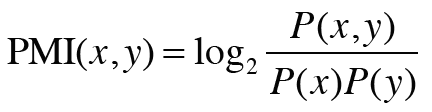

In [54]:
Image("3.png")

x, y가 동시에 일어날 확률 / x가 일어날 확률 * y가 일어날 확률 

이걸 동시발생행렬을 사용해 다시 써보면

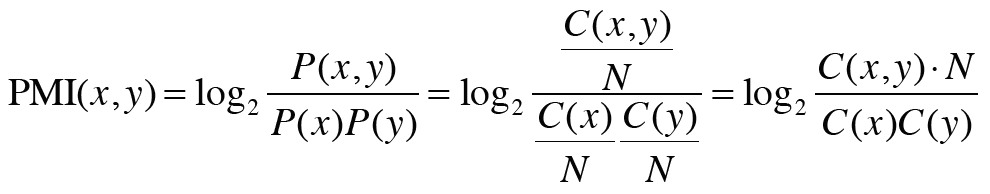

In [55]:
Image("4.png")

x, y가 동시에 말뭉치에 등장할 확률 / x가 말뭉치에 등장할 확률 * y가 말뭉치에 등장할 확률 

이렇게 하면 단어가 단독으로 출현하는 횟수가 고려되어   
어떤 별 의미 없는 단어(관사)가 매우 많이 나왔다면 그것이 분모에 위치하므로 PMI점수가 낮아지고   
보다 의미있는 단어(명사)가 적게나왔다 하더라도 그것 또한 분모에 위치하므로 PMI점수가 높아지게 된다


그런데 만약 두 단어의 동시발생횟수가 0이면 PMI값은 마이너스 무한대가 된다.

이 문제를 피하기 위해 양의 상호정보량 PPMI (positive PMI)를 사용한다

### 해결방법2 : 양의 점별상호정보량 PPMI

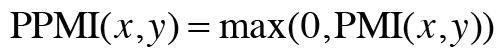

In [60]:
Image("5.png")

이렇게 하면 PMI값이 음수일 때는 0이 된다.   
이제 단어 사이의 관련성을 0 이상의 실수로 나타낼 수 있다

In [61]:
import numpy as np
def ppmi(C, verbose=False, eps = 1e-8): # 이 코드는 동시발생 행렬에 대해서만 PPMI 행렬을 구할 수 있도록 구현됨
    '''
    C: 동시발생 행렬
    verbose: 진행 상황을 출력할지 여부
    '''
    M = np.zeros_like(C, dtype=np.float32)   # 동시발생행렬과 같은 사이즈의 영행렬을 하나 만들고
    N = np.sum(C)                            # 동시발생행렬의 모든 값들을 합계한 것(14)과  
    S = np.sum(C, axis=1)                    # 동시발생행렬의 각 행(단어)의 값들을 합계한 것들의 배열을 반들어서 
                                             # array([1, 4, 2, 2, 2, 2, 1])
                                             # (동시발생행렬의 각 열의 원소들을 합계한 것들의 배열도 결과는 똑같다)
    total = C.shape[0] * C.shape[1]          # 49
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)   # PMI  <<<<<?????????????????????????????????????
            M[i, j] = max(0, pmi)                            # PPMI <<<<<<????????????????????????????????????

            if verbose:
                cnt += 1
                if cnt % (total//100 + 1) == 0:
                    print('%.1f%% 완료' % (100*cnt/total))
    return M

In [66]:
N = np.sum(C)
N

14

In [64]:
np.set_printoptions(precision=3) # 유효자릿수 세자리까지 표시
W = ppmi(C)
print("동시발생행렬")
print(C)
print('-'*50)
print("PPMI 행렬")
print(W)

동시발생행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI 행렬
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


### PPMI의 문제 :    
### 1)말뭉치의 어휘수가 증가함에 따라 각 단어 벡터의 차원 수도 증가   
   (말뭉치 개수가 10만이면, 단어벡터 차원수도 10만)   
   ### 2) 희소행렬이 된다 i.e. 벡터의 원소 대부분이 중요하지 않다 >>> 노이즈에 약하고 견고하지 못하다

## 3) 해결방법: 차원감소(특이값 분해) >>> PPMI 행렬분해

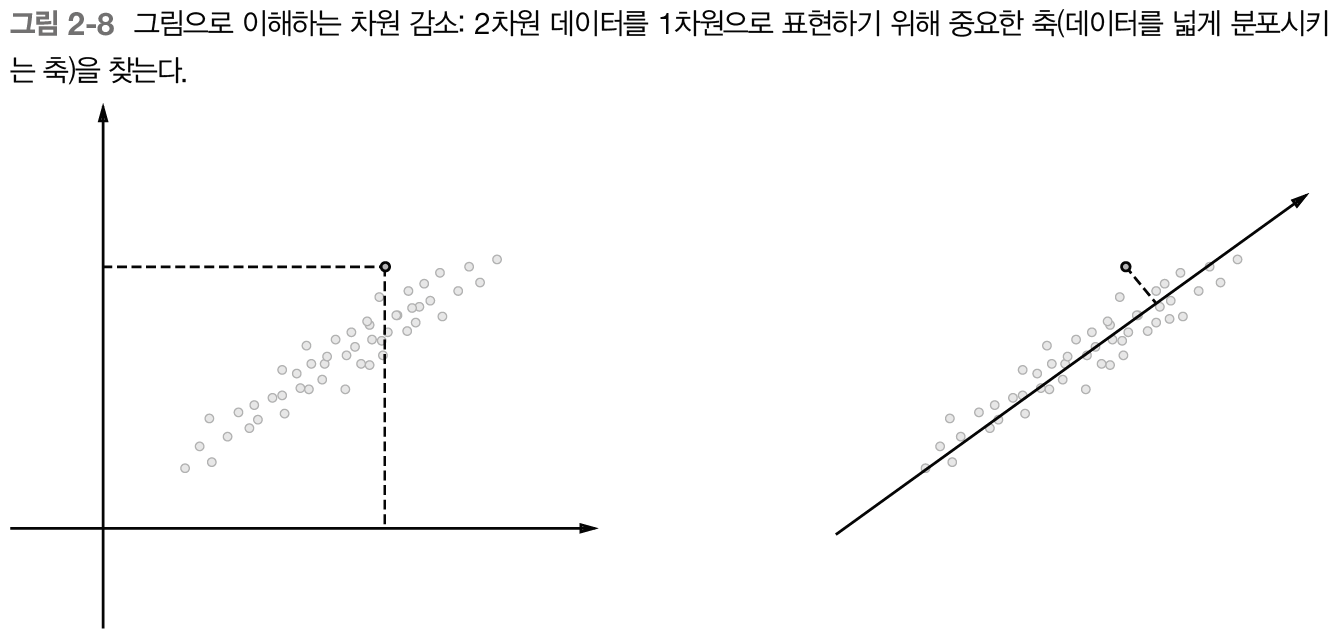

In [71]:
Image("6.png")

왼쪽은 데이터를 2차원 좌표에 표시한 것, 오른쪽은 새로운 축을 도입해 데이터를 1차원으로 (좌표축 하나만으로) 표시한 것   
   
   각 데이터의 값은 새로운 축으로 사영된 값으로 변한다   
      
      새로운 축은 데이터의 가장 적합한 축이어야 한다 (데이터가 축을 따라 가장 많이 분포되도록)   
      >>> 더 적은 차원으로도 데이터의 본질을 드러낼 수 있어야 한다. 

### 차원감소의 핵심은, (다차원) 희소벡터에서 중요한 축을 찾아내어 더 적은 차원으로 다시 표현하는 것   
   
### 차원 감소의 결과, 원래의 희소벡터는 밀집벡터로 변환된다.   
   
      
      원래의 희소벡터가 1000차원이었다면 (말뭉치가 1000개였다면)
      차원 감소 후 만들어진 밀집벡터는 더 적은 차원의 벡터로도 표현 가능해진다
   
   
### 이것이 우리가 원하는 단어의 분산표현이다

## 특이값 분해 SVD (singular value description) : 차원감소의 여러 방법 중 한가지

SVD는 임의의 행렬을 세 행렬의 곱으로 분해한다.

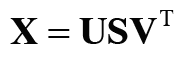

In [72]:
Image("7.png")

U와 V는 직교행렬 orthogonal matrix 이고, 그 열벡터는 서로 직교한다   
   
   S는 대각행렬 diagonal matrix이다

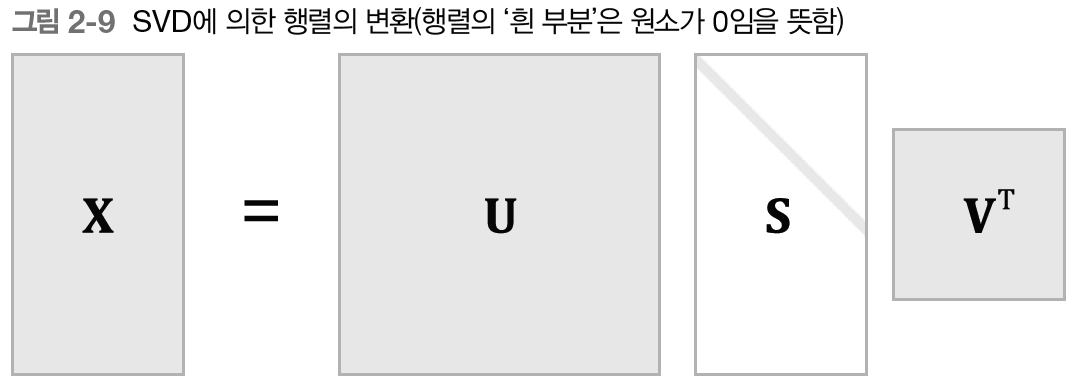

In [2]:
Image("8.png")

### U는 직교행렬이다. 이 직교행렬은 어떠한 공간의 축(기저)을 형성한다   
### 이 U행렬을 우리의 단어공간으로 취급할 수 있다   

### S는 대각행렬이다. 대각성분에는 특이값이 큰 순서대로 나열돼 있다.    
### 특이값이란 해당 축의 중요도로 간주할 수 있다.      
   
      
         
         ### 그래서 아래 그림과 같이 중요도가 낮은 원소(특이값이 작은 원소)를 깎아내는 방법을 생각할 수 있다

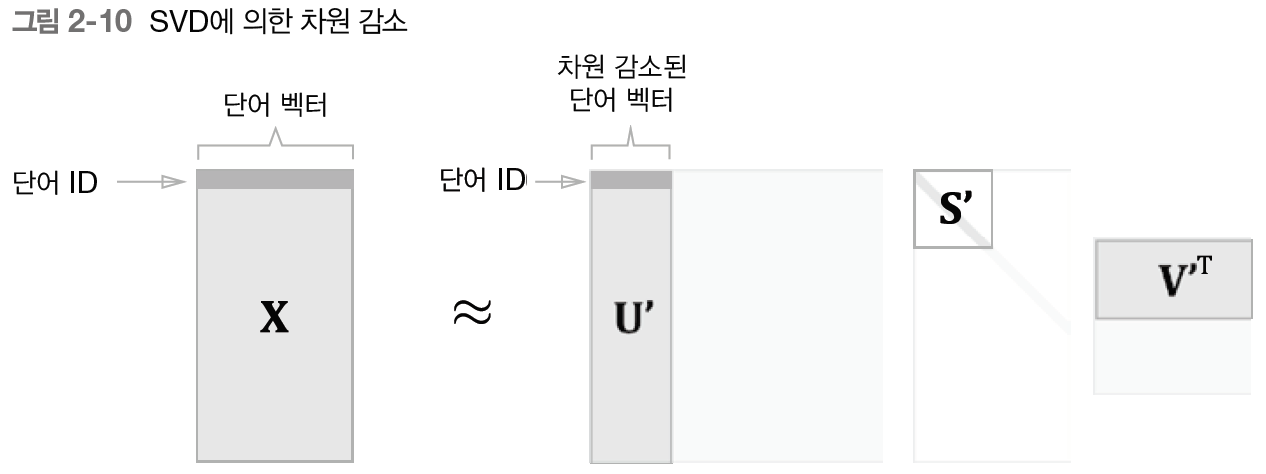

In [4]:
Image("9.png")

### 행렬 S에서 특이값이 작다면 중요다가 낮다는 뜻이므로  
   
   
### 행렬 U에서 여분의 열벡터를 깎아내어 원래의 행렬을 근사할 수 있다.  

### 행렬 X의 각 행에는 해당 단어 ID의 단어 벡터가 저장돼 있으며   
### 그 단어 벡터가 행렬 U'라는 차원 감소된 벡터로 표현되는 것이다. 

## 동시발생행렬을 PPMI행렬로 변환후 SVD를 적용하는 코드

SVD는 넘파이의 linalg 모듈이 제공하는 SVD 메서드로 실행할 수 있다. (linalg = linear algebra 선형대수)   

In [14]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi


text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size=1)
print("동시발생행렬")
print(C)
print("-"*50)
print("PPMI행렬")
np.set_printoptions(precision=3)
W = ppmi(C)
print(W)

동시발생행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI행렬
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


In [8]:
# SVD
U, S, V = np.linalg.svd(W)

In [11]:
print(U.shape, S.shape, V.shape)

(7, 7) (7,) (7, 7)


In [20]:
print(U)

[[ 0.000e+00  3.409e-01 -1.205e-01 -3.886e-16 -1.110e-16 -9.323e-01
  -2.426e-17]
 [-5.976e-01  0.000e+00  0.000e+00  1.802e-01 -7.812e-01  0.000e+00
   0.000e+00]
 [-5.551e-17  4.363e-01 -5.088e-01 -2.220e-16 -1.388e-17  2.253e-01
  -7.071e-01]
 [-4.978e-01  1.665e-16  2.776e-17  6.804e-01  5.378e-01 -1.110e-16
   7.467e-17]
 [-3.124e-17  4.363e-01 -5.088e-01 -1.600e-16 -1.302e-17  2.253e-01
   7.071e-01]
 [-3.124e-17  7.092e-01  6.839e-01 -1.600e-16 -1.302e-17  1.710e-01
   7.865e-17]
 [-6.285e-01 -1.943e-16 -2.776e-17 -7.103e-01  3.169e-01  2.220e-16
  -9.614e-17]]


In [24]:
np.set_printoptions(precision=3)  # 유효 자릿수를 세 자리로 표시
print("동시발생행렬에서 단어ID가 0인 단어벡터:", C[0]) # 희소벡터가
print("PPMI행렬에서 단어ID가 0인 단어벡터:",W[0])
print("특이값분해 된 U행렬에서 단어ID가 0인 단어벡터:",U[0])        # 밀집벡터로 바뀌었다. 

동시발생행렬에서 단어ID가 0인 단어벡터: [0 1 0 0 0 0 0]
PPMI행렬에서 단어ID가 0인 단어벡터: [0.    1.807 0.    0.    0.    0.    0.   ]
특이값분해 된 U행렬에서 단어ID가 0인 단어벡터: [ 0.000e+00  3.409e-01 -1.205e-01 -3.886e-16 -1.110e-16 -9.323e-01
 -2.426e-17]


위 밀집벡터의 차원을 감소시키려면   
예컨대 2차원 벡터로 줄이려면   
단순히 처음의 두 원소를 꺼내기만 하면 된다

In [26]:
print(U[0,:2])

[0.    0.341]


각 단어를 2차원 벡터로 표현한 후 그래프

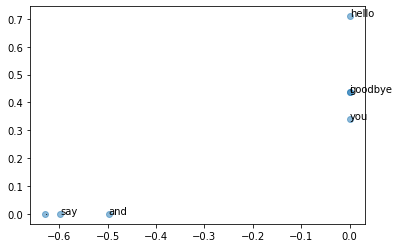

In [27]:
# 플롯
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))  # plt.annotate(word, x, y)메서드는 2차원상 좌표 x,y 지점에
                                                        # word에 담긴 텍스트를 그린다.
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

goodbye와 hello    
you와 i가 가까이 위치하고 있음을 볼 수 있다.

# SVD의 문제점

행렬의 크기가 N이면 SVD계산은 시간복잡도 N**3 이 걸린다.   
계산량이 N**3에 비례해 늘어난다는 것   

# SVD 문제의 해결책 : Truncated SVD   


Truncated SVD는 특이값이 작은 것은 버린다.   
큰 행렬에 SVD를 적용할때 고속으로 계산된다.   
아래 PTB에 적용한 예시 참고

# PTB 데이터셋으로 동시발생행렬, PPMI행렬 만들고,    
# PPMI 행렬에 Truncated SVD 계산

PTB : 펜 트리뱅크 (Penn Treebank) 벤치마크용 말뭉치로 자주 이용. 한문장이 한줄씩 저장된 말뭉치   
이 책에서는 모든 문장을 하나의 연결된 시계열 데이터로 취급

PTB 말뭉치 탐색

In [40]:
import sys
sys.path.append('..')
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말뭉치 크기:', len(corpus))     # 아마 공백기반으로 토크나이즈한 단어 말뭉치일 듯  
print('vacab 크기:', len(id_to_word))
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

말뭉치 크기: 929589
vacab 크기: 10000

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


In [41]:
corpus

array([ 0,  1,  2, ..., 39, 26, 24], dtype=int64)

### PTB 말뭉치로 동시발생행렬 만들기

In [32]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb

window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('PTB 동시발생행렬')
C = create_co_matrix(corpus, vocab_size, window_size)
print("C.shape:", C.shape)
print(C)

PTB 동시발생행렬
C.shape: (10000, 10000)
[[0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### PTB말뭉치로 PPMI행렬 만들기

In [43]:
print('PTB PPMI행렬 ')
W = ppmi(C, verbose=True)
np.set_printoptions(precision=3)  # 유효 자릿수를 세 자리로 표시
print("W.shape:", W.shape)
print(W)

PTB PPMI행렬 
1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
100.0% 완료
W.shape: (10000, 10000)
[[ 0.    19.241 18.826 ...  0.     0.     0.   ]
 [19.241  0.    18.241 

### PTB말뭉치로 만든 PPMI행렬에 SVD적용 

In [46]:
from sklearn.utils.extmath import randomized_svd

print('PTB SVD')

# truncated SVD (빠르다!)
U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5, random_state=None)

# SVD (느리다)
# U, S, V = np.linalg.svd(W)

print(U.shape, S.shape, V.shape)
word_vecs = U[:, :wordvec_size]  
print(word_vecs)
U == word_vecs

PTB SVD
(10000, 100) (100,) (100, 10000)
[[ 1.018e-10 -2.182e-07  2.218e-06 ... -1.331e-04  1.793e-04  1.450e-04]
 [ 1.005e-11 -2.395e-07 -2.142e-07 ... -1.791e-04  2.472e-04  2.014e-04]
 [-1.081e-11 -1.722e-08  9.102e-09 ... -2.336e-04  3.180e-04  2.762e-04]
 ...
 [ 4.426e-03 -6.480e-03  1.145e-02 ...  3.257e-03 -2.953e-03  1.700e-03]
 [ 2.459e-03 -4.921e-03  8.025e-03 ...  4.037e-03 -7.450e-04 -3.950e-03]
 [ 3.888e-03 -7.842e-03  8.079e-03 ...  1.541e-03 -5.543e-03  8.432e-03]]


array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [50]:
np.set_printoptions(precision=3)  # 유효 자릿수를 세 자리로 표시
print("PTB의 동시발생행렬에서 단어ID가 0인 단어벡터:", len(C[0])) # 희소벡터가
print("PTB의 PPMI행렬에서 단어ID가 0인 단어벡터:",len(W[0]))
print("PTB의 PPMI행렬을 특이값분해한 U행렬에서 단어ID가 0인 단어벡터:",len(U[0]))       # 밀집벡터로 바뀌었다. 

PTB의 동시발생행렬에서 단어ID가 0인 단어벡터: 10000
PTB의 PPMI행렬에서 단어ID가 0인 단어벡터: 10000
PTB의 PPMI행렬을 특이값분해한 U행렬에서 단어ID가 0인 단어벡터: 100


In [51]:
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)


[query] you
 i: 0.6821660399436951
 we: 0.6188770532608032
 'd: 0.5222412347793579
 anybody: 0.5147743821144104
 something: 0.5108259916305542

[query] year
 last: 0.6477319598197937
 earlier: 0.6258940100669861
 month: 0.6236138343811035
 next: 0.6080522537231445
 quarter: 0.5698643326759338

[query] car
 luxury: 0.6404695510864258
 auto: 0.62397700548172
 vehicle: 0.5190415382385254
 corsica: 0.5155409574508667
 automobiles: 0.5089346766471863

[query] toyota
 motor: 0.6739453673362732
 motors: 0.6487642526626587
 mazda: 0.6312651038169861
 lexus: 0.5814516544342041
 nissan: 0.5810261964797974


### 통계기반기법의 문제 : 계산비용이 크다


동시발생행렬이든 PPMI든 vocab 사이즈를 제곱한 크기의 행렬이 된다.   
이는 말뭉치가 커지면(vocab 사이즈도 커지므로) 그만큼 거대한 행렬이 된다는 걸 의미한다.   
문제는 거대 행렬에 SVD를 적용하는 데 많은 비용이 든다는 것이다.   
그냥 SVD는 n x n 행렬일 경우 계산시간이 n의 세제곱에 비례한다.   
근사 기법을 써서 속도를 개선해도 상당한 컴퓨팅 자원을 들여 장시간 계산해야 한다

### 통계기반기법의 장점 

말뭉치 전체 통계(동시발생행렬, PPMI 등)를 이용해 단 1회의 처리(SVD 등)만으로 단어의 분산표현을 얻을 수 있다

정리

# 분산표현 = 임베딩   
   
   

일단 단어를 벡터로 만들기만 하면 코사인 유사도를 구할 수 있다   
   

## 방법1 시소러스 

**사례)워드넷**

## 방법2 분포가설 사용

### (1) 통계기반기법
1) **동시발생행렬** : 단어-문서행렬 
2) **PMI, PPMI 행렬** 
3) **특이값 분해 SVD, Truncated SVD** (행렬분해 대상 - 동시발생행렬 , PMI, PPMI...)